<a href="https://www.kaggle.com/code/tiwariaman01/airpassenger-time-series-analysis?scriptVersionId=184008999" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [3]:
data = sns.load_dataset('flights')
print(data.head())
print('\n data types')

print(data.dtypes)

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

 data types
year             int64
month         category
passengers       int64
dtype: object


In [4]:
data['date'] = pd.to_datetime("01"+data['month'].astype('str')+'-'+ data['year'].astype('str'))
data.set_index('date',inplace=True)
data.head()

,year,month,passengers
date,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


# What is Time Series

It is a series of observations taken at specified times basically at equal intervals. It is used to predict future values based on past observed values.

# Components of Time Series

* Trend
Increasing or
Decreasing value in the series

* Seasonality
A general systematic linear or (most often)
non-linear component that changes over time and does repeat.


* Irregularity
The data in the time series follows
a temporal sequence, but the measurements might not happen at a regular time interval.

* Cyclic
Pattern exists when data exhibit rises & falls that are not of fixed period.
Time Series Analysis

# What is Stationarity?

**Points to Remember**


> In stationary TS, the mean, variance and covariance of the series should not be a function of time rather should be a constant.

TS data can be stationary by removing their various components:
*  Trend - Varying over time
*  Seasonality - Variations at specific time
*  Cyclic
*  Irregularity


# How to make TS stationary?
**Points to Remember**


Two common techniques:
* Differencing
* Transforming


# Testing TS Stationarity

**Checks for Stationarity**

There are many methods to check whether a time series is stationary or non-stationary.

1. Look at Plots: You can review a time series plot of your data and visually check if there are any obvious trends or seasonality.
2. Summary Statistics: You can review the summary statistics for your data for seasons or random partitions and check for obvious or significant differences.
3. Statistical Tests: You can use statistical tests to check if the expectations of stationarity are met or have been violated.

 **Let's talk about ADF Test**

Statistical tests make strong assumptions about your data. They can only be used to inform the degree to which a null hypothesis can be rejected or fail to be reject. The result must be interpreted for a given problem to be meaningful.
Nevertheless, they can provide a quick check and confirmatory evidence that your time series is stationary or non-stationary.
ADF Test is otherwise known as unit root test.

**ADF Hypothesis**

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.
* **Null Hypothesis (HO)**: If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

* **Alternate Hypothesis (H1)**: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

* p-value > 05: fail to reject the null hypothesis (Hl), the data follow unit root  and not stationary.
* p-value <= 0.05: Reject the null hypothesis (HO), the data does not have a unit root and is stationary.

* Test Statistic < crtical values

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='passengers'>

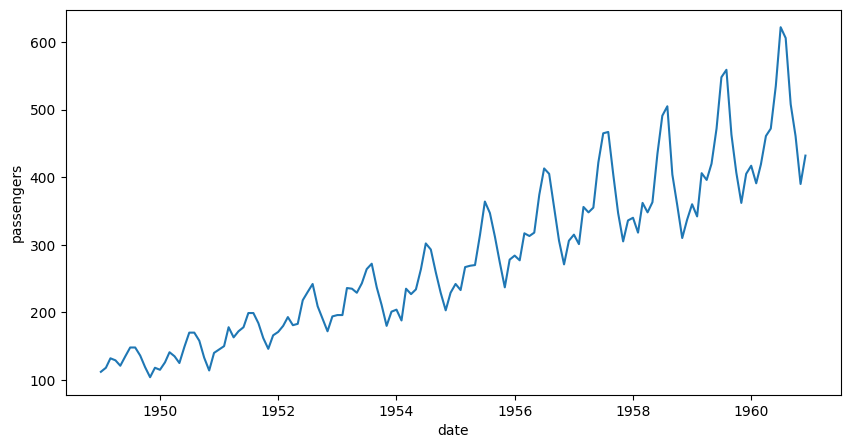

In [5]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data,x=data.index,y=data.passengers)


In [6]:
ts = data[['passengers']]
ts.head()

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
def test_stationarity(dataFrame, var):
    dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
    dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()
    
    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(dataFrame[var],autolag='AIC')
    stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
    print(stats)
    
    for key, values in adfTest[4].items():
        print('criticality',key,":",values)
        
    sns.lineplot(data=dataFrame,x=dataFrame.index,y=var)
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollMean')
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollStd')


/tmp/ipykernel_18/783629771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()


Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

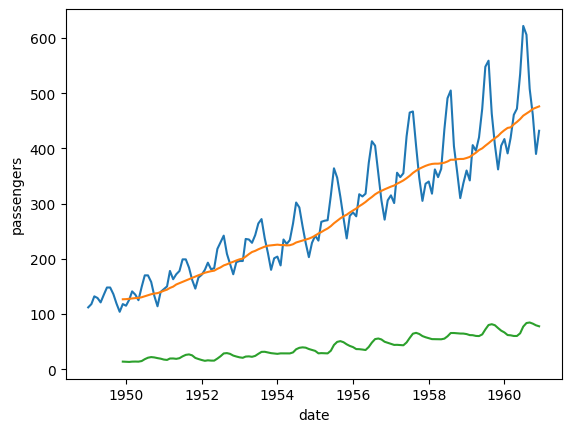

In [8]:
test_stationarity(ts,'passengers')

the time series is not statinory.

/tmp/ipykernel_18/783629771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
/tmp/ipykernel_18/783629771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opt

Test Statistic                  -2.719697
p-value                          0.070691
#lags used                      12.000000
number of observations used    120.000000
dtype: float64
criticality 1% : -3.486055829282407
criticality 5% : -2.8859430324074076
criticality 10% : -2.5797850694444446


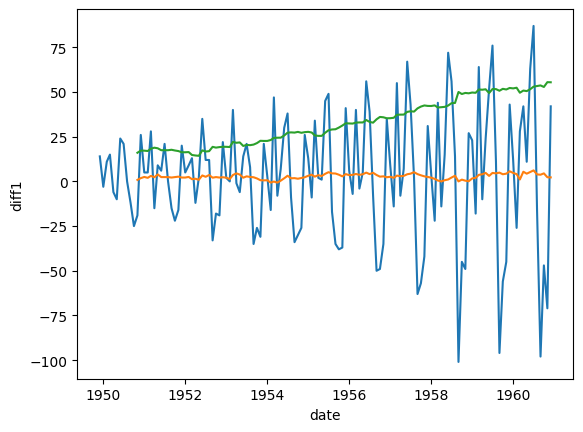

In [9]:

ts['diff1'] = ts['passengers'] - ts['passengers'].shift()
test_stationarity(ts.dropna(),'diff1')

/tmp/ipykernel_18/783629771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
/tmp/ipykernel_18/783629771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opt

Test Statistic                  -2.951603
p-value                          0.039668
#lags used                      11.000000
number of observations used    121.000000
dtype: float64
criticality 1% : -3.485585145896754
criticality 5% : -2.885738566292665
criticality 10% : -2.5796759080663887


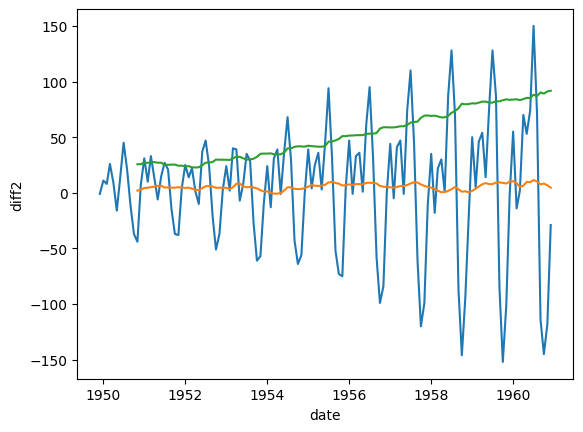

In [10]:
ts['diff2'] = ts['passengers'] - ts['passengers'].shift(2)
test_stationarity(ts.dropna(),'diff2')

/tmp/ipykernel_18/783629771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
/tmp/ipykernel_18/783629771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opt

Test Statistic                  -1.391891
p-value                          0.586157
#lags used                      13.000000
number of observations used    119.000000
dtype: float64
criticality 1% : -3.4865346059036564
criticality 5% : -2.8861509858476264
criticality 10% : -2.579896092790057


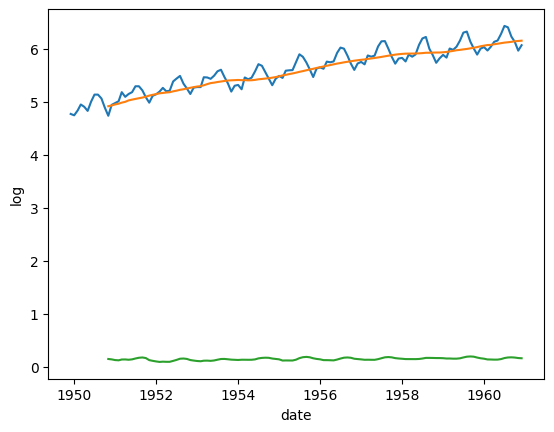

In [11]:
ts['log'] = np.log(ts['passengers'])
test_stationarity(ts.dropna(),'log')

/tmp/ipykernel_18/783629771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
/tmp/ipykernel_18/783629771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opt

Test Statistic                  -0.335199
p-value                          0.920369
#lags used                      13.000000
number of observations used    119.000000
dtype: float64
criticality 1% : -3.4865346059036564
criticality 5% : -2.8861509858476264
criticality 10% : -2.579896092790057


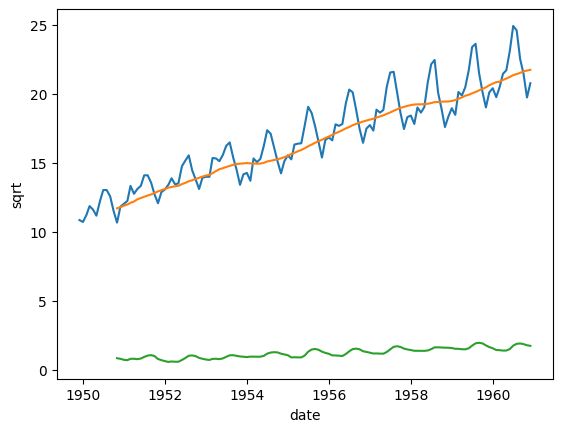

In [12]:
ts['sqrt'] = np.sqrt(ts['passengers'])
test_stationarity(ts.dropna(),'sqrt')

/tmp/ipykernel_18/783629771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
/tmp/ipykernel_18/783629771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opt

Test Statistic                  -3.164968
p-value                          0.022104
#lags used                      13.000000
number of observations used    119.000000
dtype: float64
criticality 1% : -3.4865346059036564
criticality 5% : -2.8861509858476264
criticality 10% : -2.579896092790057


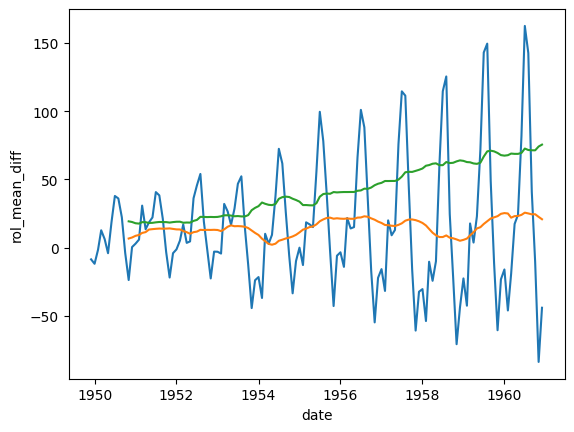

In [13]:
ts['rol_mean_diff'] = ts['passengers'] - ts['rollMean']
test_stationarity(ts.dropna(),'rol_mean_diff')

In [14]:
ts.tail()

,passengers,rollMean,rollStd,diff1,diff2,log,sqrt,rol_mean_diff
date,,,,,,,,
1960-08-01,606,463.333333,83.630500,-16.0,71.0,6.406880,24.617067,142.666667
1960-09-01,508,467.083333,84.617276,-98.0,-114.0,6.230481,22.538855,40.916667
1960-10-01,461,471.583333,82.541954,-47.0,-145.0,6.133398,21.470911,-10.583333
1960-11-01,390,473.916667,79.502382,-71.0,-118.0,5.966147,19.748418,-83.916667
1960-12-01,432,476.166667,77.737125,42.0,-29.0,6.068426,20.784610,-44.166667


In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts['log'])

In [16]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

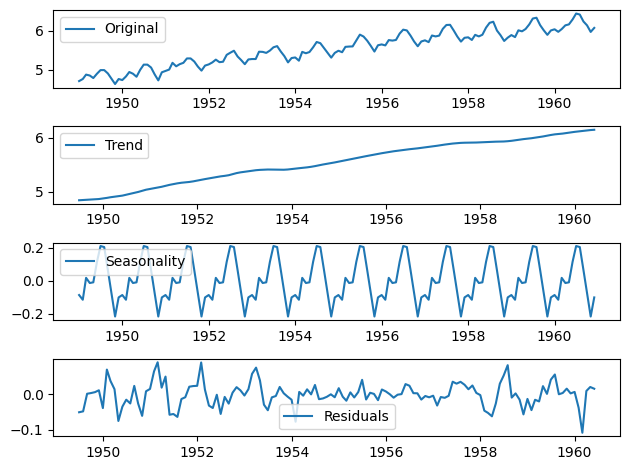

In [17]:
plt.subplot(411)
plt.plot(ts['log'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


/tmp/ipykernel_18/783629771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
/tmp/ipykernel_18/783629771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opt

Test Statistic                  -3.383021
p-value                          0.011551
#lags used                       1.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


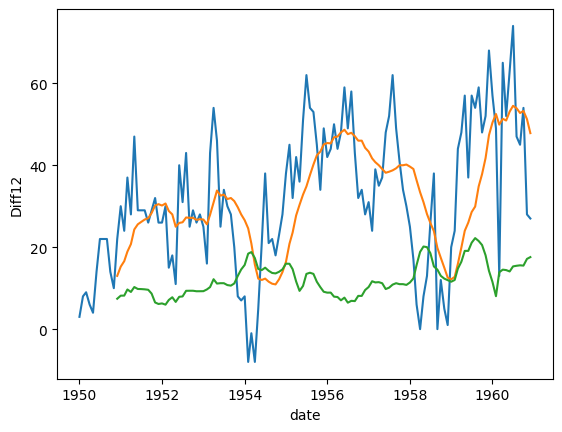

In [18]:
airP = ts[['passengers']].copy(deep=True)
airP['firstDiff'] = ts['passengers'].diff()
airP['Diff12'] = ts['passengers'].diff(12)

test_stationarity(airP.dropna(),'Diff12')

In [19]:
decomposition = seasonal_decompose(airP['Diff12'].dropna())
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

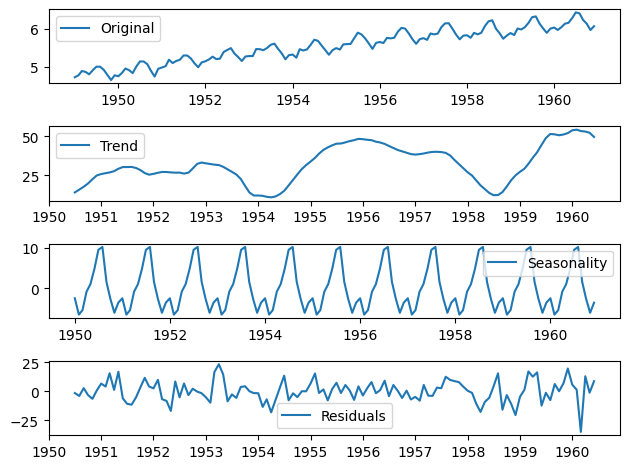

In [20]:
plt.subplot(411)
plt.plot(ts['log'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [21]:
airP.head()

,passengers,firstDiff,Diff12
date,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN


In [22]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

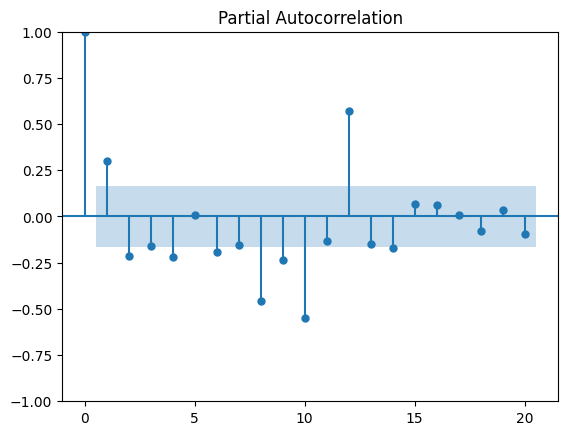

In [23]:
plot_pacf(airP['firstDiff'].dropna(),lags=20);

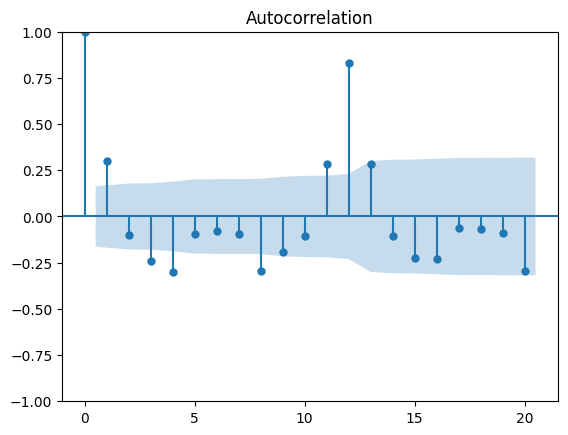

In [24]:
plot_acf(airP['firstDiff'].dropna(),lags=20);

In [25]:
train = airP[:round(len(airP)*70/100)]
test = airP[round(len(airP)*70/100):]
test.head()


,passengers,firstDiff,Diff12
date,,,
1957-06-01,422,67.0,48.0
1957-07-01,465,43.0,52.0
1957-08-01,467,2.0,62.0
1957-09-01,404,-63.0,49.0
1957-10-01,347,-57.0,41.0


In [26]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['passengers'],order=(2,1,2))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
airP['arimaPred'] = prediction
airP.tail()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,passengers,firstDiff,Diff12,arimaPred
date,,,,
1960-08-01,606,-16.0,47.0,341.778207
1960-09-01,508,-98.0,45.0,341.778206
1960-10-01,461,-47.0,54.0,341.778206
1960-11-01,390,-71.0,28.0,341.778205
1960-12-01,432,42.0,27.0,341.778205


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='date', ylabel='passengers'>

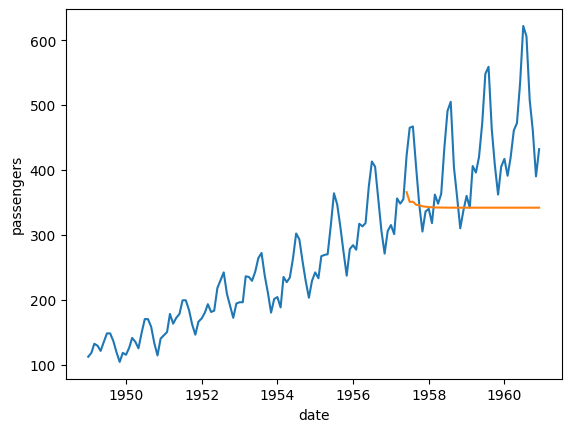

In [27]:
airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='arimaPred')


In [28]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test['passengers'],prediction))

110.55303871097719

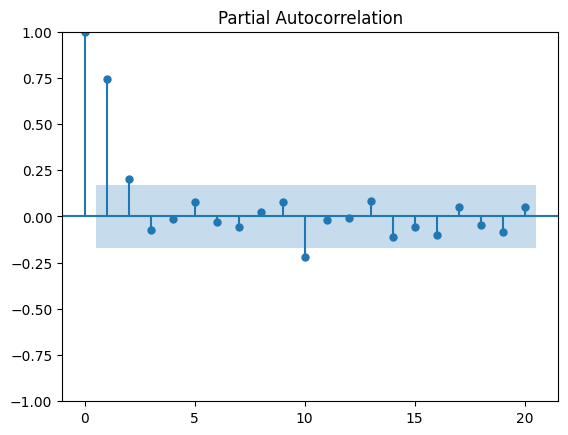

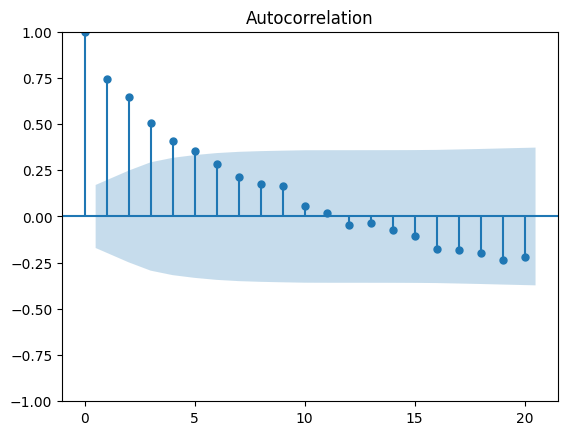

In [29]:
plot_pacf(airP['Diff12'].dropna(),lags=20);
plot_acf(airP['Diff12'].dropna(),lags=20);


In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['passengers'],order=(2,1,2),seasonal_order=(2,1,4,12))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
airP['sarimaxPred'] = prediction


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19747D+00    |proj g|=  1.59031D-01

At iterate    5    f=  3.15863D+00    |proj g|=  3.59168D-02

At iterate   10    f=  3.14200D+00    |proj g|=  1.39206D-02

At iterate   15    f=  3.13381D+00    |proj g|=  5.60526D-03

At iterate   20    f=  3.13103D+00    |proj g|=  9.22115D-03

At iterate   25    f=  3.13048D+00    |proj g|=  9.08303D-04

At iterate   30    f=  3.13033D+00    |proj g|=  1.44251D-03

At iterate   35    f=  3.13025D+00    |proj g|=  6.80085D-04

At iterate   40    f=  3.13022D+00    |proj g|=  1.02987D-03

At iterate   45    f=  3.13013D+00    |proj g|=  1.25993D-03

At iterate   50    f=  3.13010D+00    |proj g|=  4.89127D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='date', ylabel='passengers'>

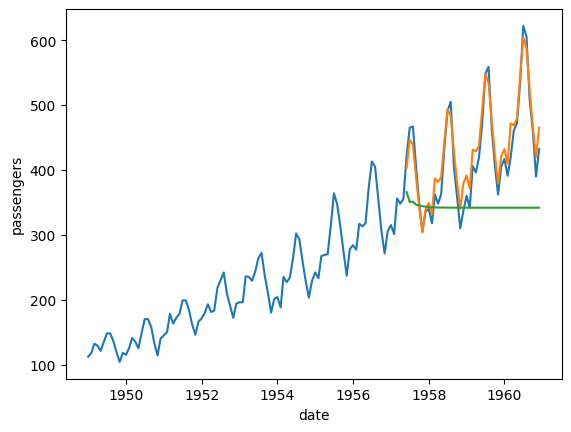

In [31]:
airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='sarimaxPred')
sns.lineplot(data=airP,x=airP.index,y='arimaPred')

In [32]:
np.sqrt(mean_squared_error(test['passengers'],prediction))

22.252376154145757

In [33]:
futureDate = pd.DataFrame(pd.date_range(start='1961-01-01', end='1962-12-01',freq='MS'),columns=['Dates'])
futureDate.set_index('Dates',inplace=True)
futureDate.head()


""
Dates
1961-01-01
1961-02-01
1961-03-01
1961-04-01
1961-05-01


In [34]:
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1])


1961-01-01    479.090938
1961-02-01    452.942055
1961-03-01    521.764001
1961-04-01    519.920918
1961-05-01    531.270463
1961-06-01    598.808582
1961-07-01    662.294758
1961-08-01    643.382208
1961-09-01    574.703131
1961-10-01    515.155240
1961-11-01    463.672234
1961-12-01    511.154740
1962-01-01    525.039784
1962-02-01    496.432807
1962-03-01    567.520837
1962-04-01    565.016014
1962-05-01    577.815128
1962-06-01    655.039757
1962-07-01    721.762686
1962-08-01    701.515321
1962-09-01    627.176062
1962-10-01    563.415510
1962-11-01    510.339273
1962-12-01    560.459124
Freq: MS, Name: predicted_mean, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='date', ylabel='passengers'>

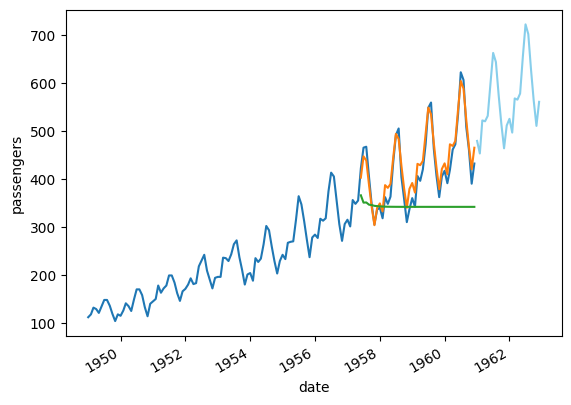

In [35]:
airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='sarimaxPred')
sns.lineplot(data=airP,x=airP.index,y='arimaPred')
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot(color='skyblue')

